In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

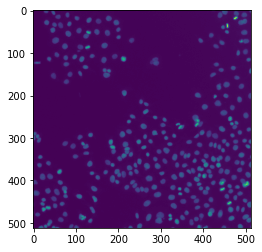

In [12]:
img = skimage.data.human_mitosis()
#img = skimage.data.coins()
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img) #removed the gray map to reveal the colour

In [47]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [48]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(smaller_img, [-1, 1])  # Outpus

In [53]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid'),
    Dense(8, activation= 'tanh'),
    Dense(16, input_dim=6, activation='sigmoid') #added 2 layers, changing the activations as well as the number of neurons
])
model.compile(loss='mse', optimizer='Adam')

In [54]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0070
Epoch 2/8
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0021
Epoch 3/8
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0021
Epoch 4/8
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0021
Epoch 5/8
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0021
Epoch 6/8
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0021
Epoch 7/8
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0021
Epoch 8/8
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0021


In [55]:
prediction = model.predict(X)

128/128 [==============================] - 0s 2ms/step


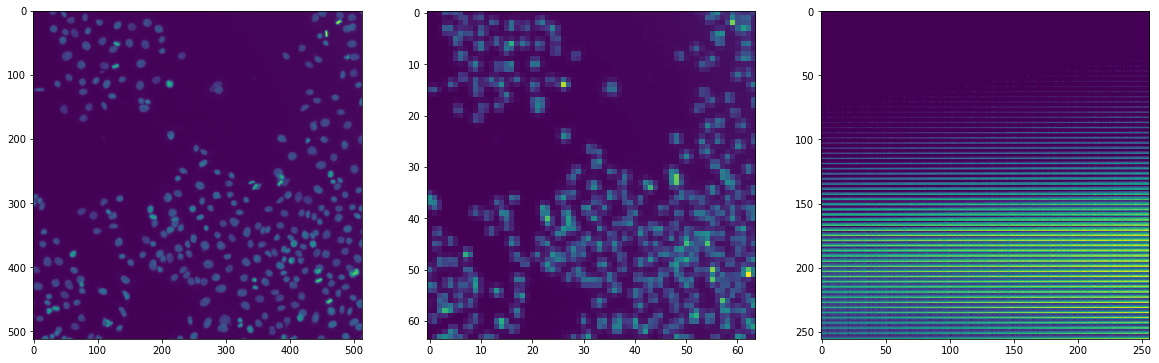

In [56]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (256,256))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

### In a paragraph or so, describe how the image we have created differs from a normal image.
Visually the relationship between the colours within the image changed, the purple background takes up less of the visuals on the final plot in comparison to the first. The middle plot still retains some semblance of the original image in shape and location of the cells within the image whereas in the final plot it it completely devolved from the original image. 

Looking at the final plot without the context of the first image being its origin it something that doesn't exist in reality as to what we are looking at and at the same time structured. This is an obvious difference from a 'normal' image because most are rooted in our visual reality in some capacity and because of that lacks the rigid structure that can be seen here in the grid. An aspect of this grid is the colours I can see in the final plot shift when I move, which I suspect is due to the relationship of the different lines of pixels working in different ways in your eye when you move. This isn't something I've ever noticed in a normal image.

